In [1]:
import pandas as pd

# Load the dataset and check dataset structure
df = pd.read_csv("AB_NYC_2019.csv")
print(df.head())
print(df.info())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [2]:
# Check for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicate values:", df.duplicated().sum())

# Handle missing values and remove duplicate records
df.dropna(subset=["name", "host_name"], inplace=True)  
df["reviews_per_month"].fillna(0, inplace=True)  
df["last_review"].fillna("No Review", inplace=True) 

print(df.info())

Missing values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Duplicate values: 0
<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name              

In [3]:
# Use Pandas to connect with an SQLite database and execute SQL queries
import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("airbnb", conn, index=False, if_exists="replace")  

# Run an SQL query
queries = {
    "avg_price_by_neighbourhood": "SELECT neighbourhood_group, AVG(price) AS avg_price FROM airbnb GROUP BY neighbourhood_group ORDER BY avg_price DESC;",
    "total_listings_by_neighbourhood": "SELECT neighbourhood_group, COUNT(*) AS total_listings FROM airbnb GROUP BY neighbourhood_group ORDER BY total_listings DESC;",
    "max_price_by_neighbourhood": "SELECT neighbourhood_group, MAX(price) AS max_price FROM airbnb GROUP BY neighbourhood_group ORDER BY max_price DESC;"
}
results = {name: pd.read_sql(query, conn) for name, query in queries.items()}

for name, df in results.items():
    print(f"\n{name}:\n", df)

conn.close()


avg_price_by_neighbourhood:
   neighbourhood_group   avg_price
0           Manhattan  196.897473
1            Brooklyn  124.410523
2       Staten Island  114.812332
3              Queens   99.536017
4               Bronx   87.469238

total_listings_by_neighbourhood:
   neighbourhood_group  total_listings
0           Manhattan           21643
1            Brooklyn           20089
2              Queens            5664
3               Bronx            1089
4       Staten Island             373

max_price_by_neighbourhood:
   neighbourhood_group  max_price
0              Queens      10000
1           Manhattan      10000
2            Brooklyn      10000
3       Staten Island       5000
4               Bronx       2500


In [9]:
df = pd.read_csv("AB_NYC_2019.csv")

# Compute key statistics
print("Average price:", df["price"].mean())
print("Median price:", df["price"].median())
print(df.groupby("neighbourhood_group")["price"].mean())

Average price: 152.7206871868289
Median price: 106.0
neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


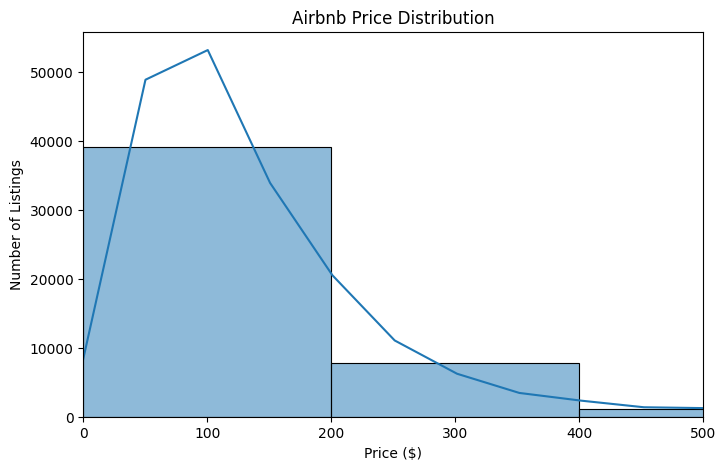

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.xlim(0, 500)  # Remove extreme values
plt.title("Airbnb Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.show()

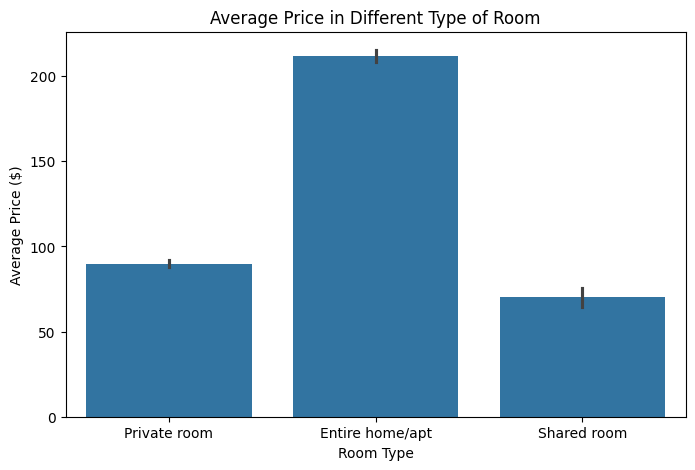

In [14]:
# Comparing Average Prices Across Neighborhoods
plt.figure(figsize=(8, 5))
sns.barplot(x="room_type", y="price", data=df, estimator=lambda x: x.mean())
plt.title("Average Price in Different Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.show()

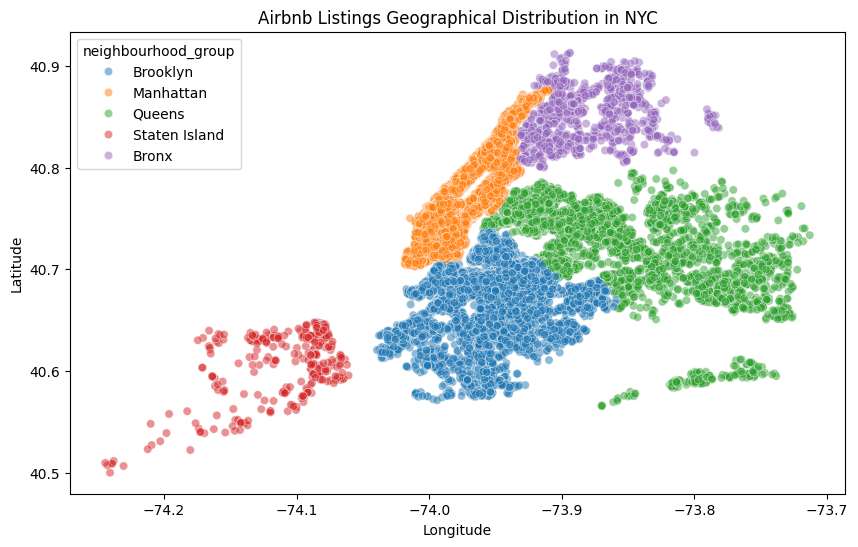

In [13]:
# Visualizing Airbnb Listings on a Map
plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group", alpha=0.5, data=df)
plt.title("Airbnb Listings Geographical Distribution in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()